<a href="https://colab.research.google.com/github/CIBIO-TropiBIO/Knowledge-and-Ignorance-of-Namibia-s-biodiversity/blob/main/Audit_Thaina_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author:   Javier Martinez Arribas       
# Date:     09 - September - 2022          
# Contact:  javimartinezarribas@gmail.com 


---


#### **1. Libraries needed (maybe you have to add or remove some packages from the list)**

In [1]:
load.libraries <- c('gamlss','tidyverse','ggpubr','skimr','readxl','fitdistrplus','zoib')
install.lib <- load.libraries[!load.libraries %in% installed.packages()]
for(libs in install.lib) install.packages(libs, dependences = TRUE)
sapply(load.libraries, require, character = TRUE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gamlss.data’, ‘gamlss.dist’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rjags’, ‘coda’, ‘Formula’


Warning message in install.packages(libs, dependences = TRUE):
“installation of package ‘rjags’ had non-zero exit status”
Warning message in install.packages(libs, dependences = T

gamlss    tidyverse       ggpubr        skimr       readxl fitdistrplus 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
        zoib 
       FALSE

#### **2. Loading files for Amphibians, Aves, Insecta, Liliopsida, Magnoliopsida, Mammalia, (n=5 for Ignorance Score)**

In [2]:
file1 = "NamibiaAmphibiaLogNormIgn.xls"  
file2 = "NamibiaAvesLogNormIgn.xls"      
file3 = "NamibiaInsectaLogNormIgn.xls"
file4 = "NamibiaLiliopsidaLogNormIgn.xls"
file5 = "NamibiaMagnoliopsidaLogNormIgn.xls"
file6 = "NamibiaMammaliaLogNormIgn.xls"
file7 = "NamibiaReptiliaLogNormIgn.xls"

df1 = data.frame(read_excel(file1))   #Amphibia
df2 = data.frame(read_excel(file2))   #Aves
df3 = data.frame(read_excel(file3))   #Insecta
df4 = data.frame(read_excel(file4))   #Liliopsida
df5 = data.frame(read_excel(file5))   #Magnoliopsida
df6 = data.frame(read_excel(file6))   #Mammalia
df7 = data.frame(read_excel(file7))   #Reptilia

In [4]:
head(df1)

,ignScore,FID,RD,UD,PAD,FC,POD,STP,Longitude,Latitude
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000100,18019,0.393,138.9807,0.00000,0.30842065,260.3895,0.008640764,13.83286,-17.39066
2,0.01417696,6789,0.636,249.1216,20.43522,0.00009470,9.9306,0.013981667,16.30068,-24.50973
3,0.09640613,18639,0.217,203.4085,0.00000,0.09979011,195.2844,0.007286911,13.28003,-17.00073
4,0.20749123,16965,1.615,263.1935,0.00000,4.55773065,5665.5498,0.010320449,21.55996,-18.09381
5,0.20749123,17990,0.341,0.0000,0.00000,8.02187055,6060.5165,0.009649476,24.23989,-17.46870
6,0.23524169,17084,0.240,318.8803,0.00000,4.58276259,1945.6440,0.010670739,20.90512,-18.01560


#### **3. Checking Response Variable Distribution**
Simulation for Namibia observations to check the sample distribution


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



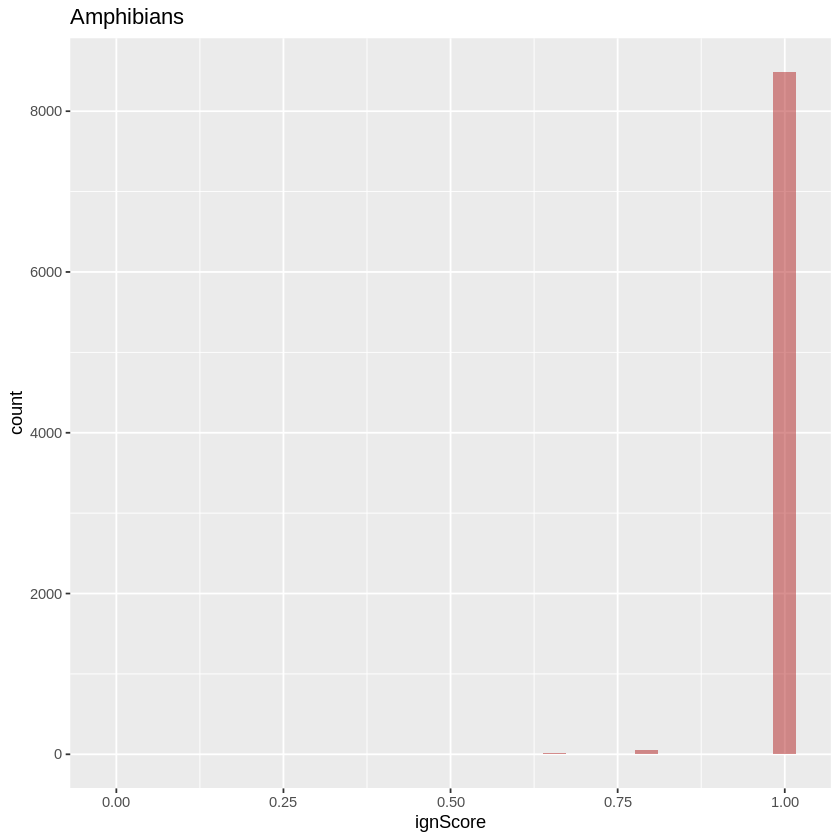

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



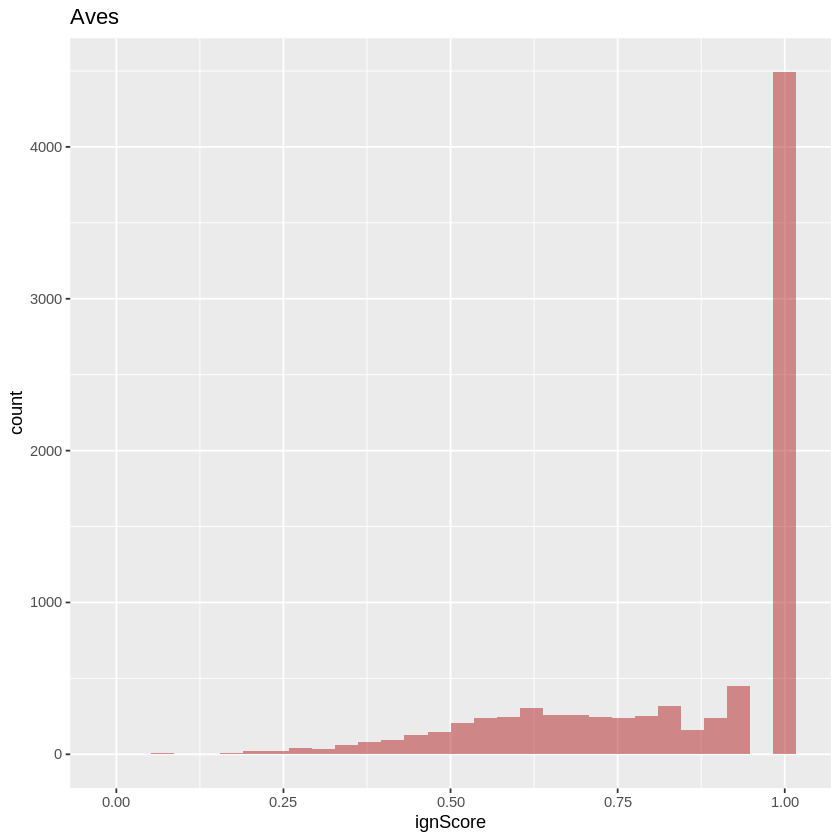

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



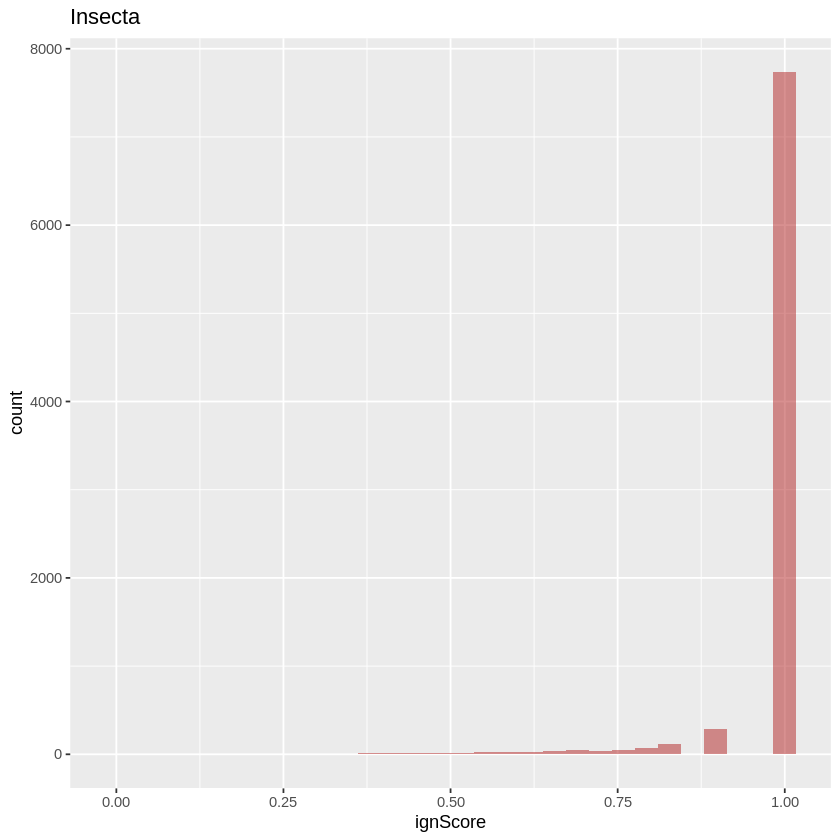

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



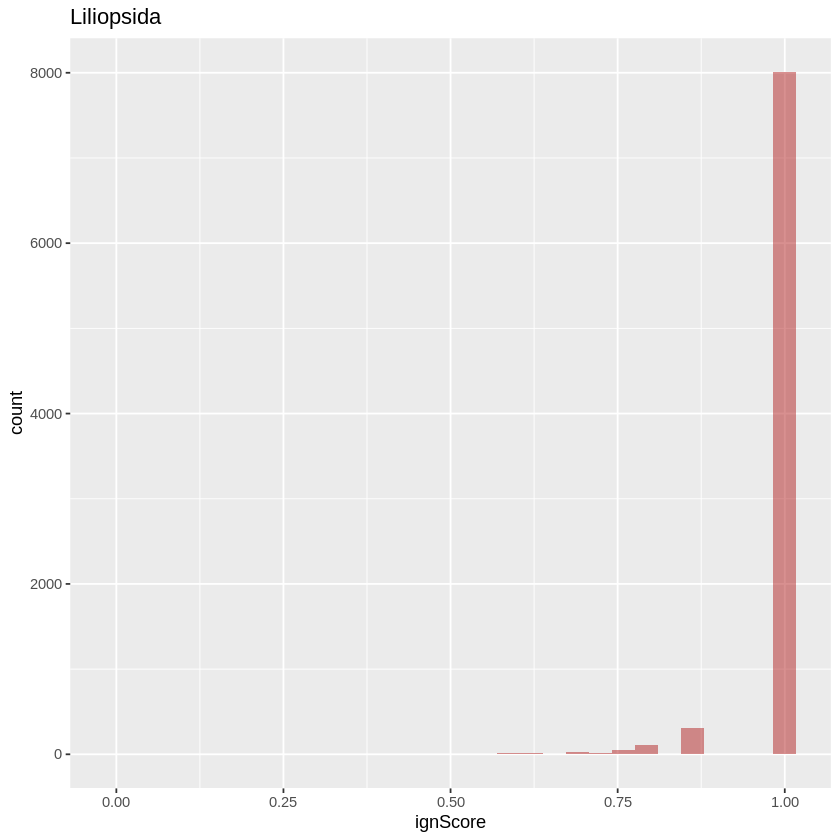

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



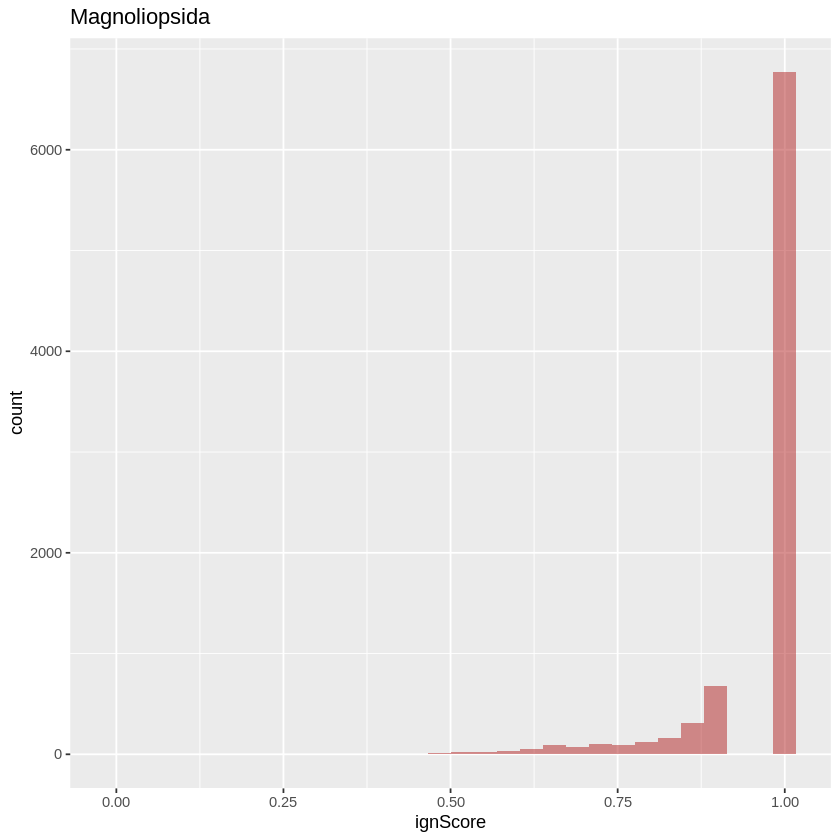

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



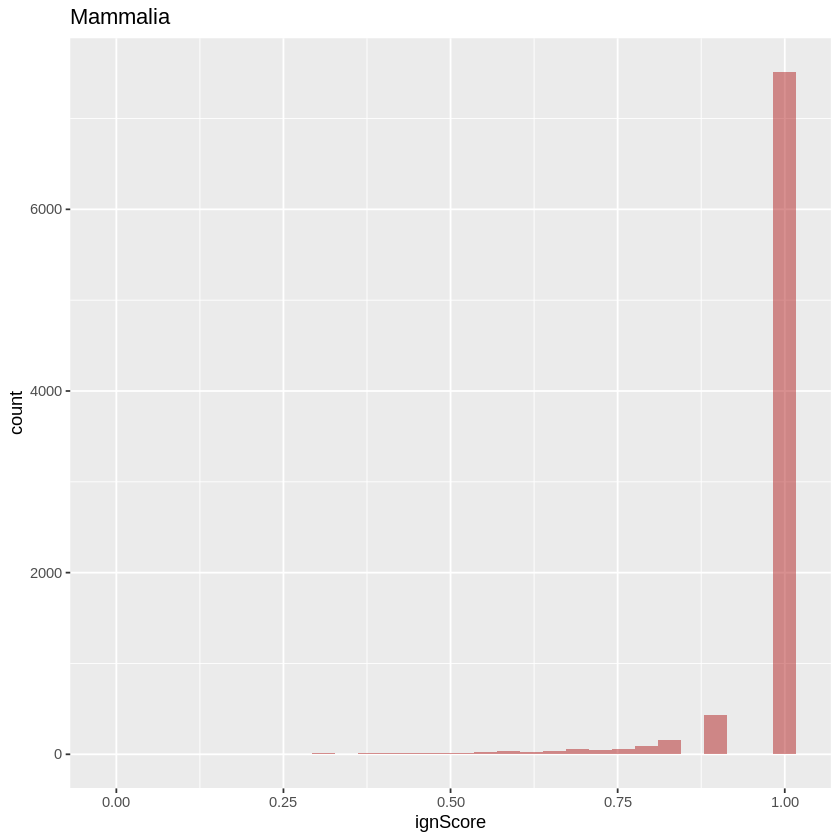

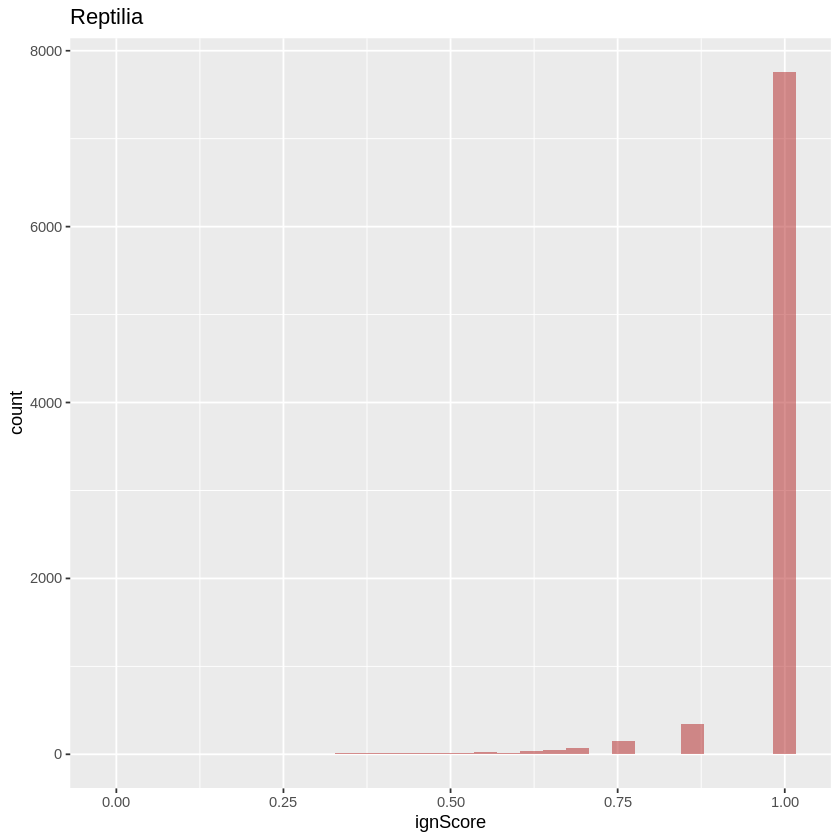

In [3]:
#Amphibians
ggplot() +
    geom_histogram(
        data = df1,
        aes(x = ignScore),
        alpha = 0.5, fill = "firebrick") +
    ggtitle("Amphibians")
#Aves
ggplot() +
    geom_histogram(
        data = df2,
        aes(x = ignScore),
        alpha = 0.5, fill = "firebrick")+
    ggtitle("Aves") 
#Insecta
ggplot() +
    geom_histogram(
        data = df3,
        aes(x = ignScore),
        alpha = 0.5, fill = "firebrick")+
    ggtitle("Insecta") 
#Liliopsida
ggplot() +
    geom_histogram(
        data = df4,
        aes(x = ignScore),
        alpha = 0.5, fill = "firebrick") +
    ggtitle("Liliopsida")
#Magnoliopsida
ggplot() +
    geom_histogram(
        data = df5,
        aes(x = ignScore),
        alpha = 0.5, fill = "firebrick") +
    ggtitle("Magnoliopsida") 
#Mammalia
ggplot() +
    geom_histogram(
        data = df6,
        aes(x = ignScore),
        alpha = 0.5, fill = "firebrick") +
    ggtitle("Mammalia") 
#Reptilia
ggplot() +
    geom_histogram(
        data = df7,
        aes(x = ignScore),
        alpha = 0.5, fill = "firebrick") +
    ggtitle("Reptilia")


### Models



---


Amphibians model

Warning message in additive.fit(x = X, y = wv, w = wt * w, s = s, who = who, smooth.frame, :
“additive.fit convergence not obtained in  30  iterations”
Warning message in additive.fit(x = X, y = wv, w = wt * w, s = s, who = who, smooth.frame, :
“additive.fit convergence not obtained in  30  iterations”
Warning message in additive.fit(x = X, y = wv, w = wt * w, s = s, who = who, smooth.frame, :
“additive.fit convergence not obtained in  30  iterations”
Warning message in additive.fit(x = X, y = wv, w = wt * w, s = s, who = who, smooth.frame, :
“additive.fit convergence not obtained in  30  iterations”
Warning message in additive.fit(x = X, y = wv, w = wt * w, s = s, who = who, smooth.frame, :
“additive.fit convergence not obtained in  30  iterations”
Warning message in additive.fit(x = X, y = wv, w = wt * w, s = s, who = who, smooth.frame, :
“additive.fit convergence not obtained in  30  iterations”
Warning message in RS():
“Algorithm RS has not yet converged”


******************************************************************
Family:  c("BEINF1", "Beta Inflated one") 

Call:  gamlss(formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) +  
    pb(FC) + pb(POD) + pb(STP), nu.formula = ignScore ~  
    pb(RD) + pb(UD) + pb(PAD) + pb(FC) + pb(POD) +  
        pb(STP), family = BEINF1, data = df1, trace = FALSE) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  logit
Mu Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  2.306e+00  1.866e-01   12.356  < 2e-16 ***
pb(RD)      -1.666e+01  9.424e-02 -176.739  < 2e-16 ***
pb(UD)       1.588e-03  3.631e-04    4.374 1.24e-05 ***
pb(PAD)      7.327e-03  1.343e-03    5.457 4.99e-08 ***
pb(FC)      -1.506e-01  1.316e-02  -11.442  < 2e-16 ***
pb(POD)      3.149e-04  7.408e-06   42.514  < 2e-16 ***
pb(STP)      4.439e+02  1.256e+01   35.336  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

--

Warning message in wp(mod_amph, ylim.all = 1.2):
“Some points are missed out 
increase the y limits using ylim.all”


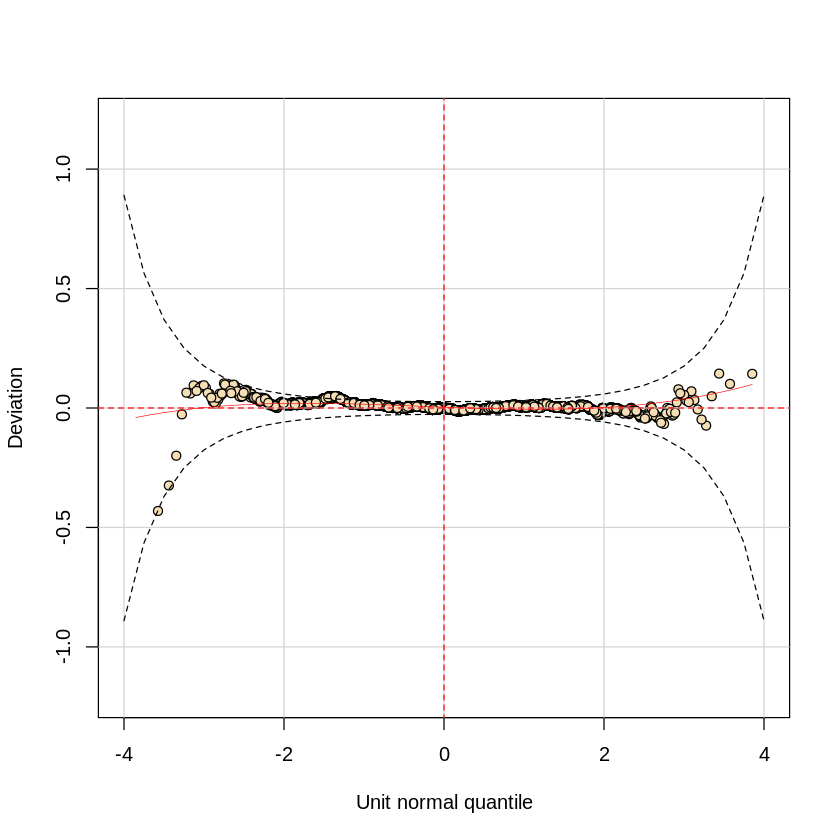

In [4]:
mod_amph <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  family  = BEINF1,
  data    = df1,
  trace   = FALSE
)
summary(mod_amph)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_amph, ylim.all = 1.2)

In [5]:
nC = detectCores()

In [ ]:
## Predictors selection for the mean
stepGAIC(mod_amph, what = "mu", parallel = "multicore", ncpus = nC)

In [ ]:
## Pedictors selection for the shape
stepGAIC(mod_amph, what = "nu", parallel = "multicore", ncpus = nC)

In [ ]:
## Final Model
# Depending on drop1 results you will need to add or remove predictors from the formula below

mod_amph_final <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(POD) + pb(FC) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(PAD) + pb(POD) + pb(UD) + pb(FC) + pb(STP),
  family  = BEINF1,
  data    = df1,
  trace   = FALSE
)
summary(mod_amph_final)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_amph, ylim.all = 1.2)

In [ ]:
termplot(mod_amph_final,parameter="mu", pages=5, ask=FALSE, rug=TRUE, se=FALSE)

Aves model



---




In [ ]:
mod_aves <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  family  = BEINF1,
  data    = df2,
  trace   = FALSE
)
summary(mod_aves)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_aves, ylim.all = 1.2)

In [ ]:
## Predictors selection for the mean
stepGAIC(mod_aves, what = "mu", parallel = "multicore", ncpus = nC)

In [ ]:
## Pedictors selection for the shape
stepGAIC(mod_aves, what = "nu", parallel = "multicore", ncpus = nC)

In [ ]:
## Final Model
# Depending on drop1 results you will need to add or remove predictors from the formula below

mod_aves_final <- gamlss(
  formula = ignScore ~ pb(RD) + pb(PAD) + pb(UD) + pb(POD) + pb(FC) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(PAD) + pb(UD) + pb(POD) + pb(FC) + pb(STP),
  family  = BEINF1,
  data    = df2,
  trace   = FALSE
)
summary(mod_aves_final)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_aves_final, ylim.all = 1.2)

In [ ]:
termplot(mod_aves_final, parameter="mu", pages=6, ask=FALSE, rug=TRUE, se=FALSE)

Insecta model



---




In [ ]:
mod_insec <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  family  = BEINF1,
  data    = df3,
  trace   = FALSE
)
summary(mod_insec)

# Godness of fit
# If you got an advertency here, please increase ylim.all argument
wp(mod_insec, ylim.all = 1.2)

In [ ]:
## Predictors selection for the mean
stepGAIC(mod_insec, what = "mu", parallel = "multicore", ncpus = nC)

In [ ]:
## Pedictors selection for the shape
stepGAIC(mod_insec, what = "nu", parallel = "multicore", ncpus = nC)

In [ ]:
## Final Model
# Depending on drop1 results you will need to add or remove predictors from the formula below

mod_insec_final <- gamlss(
  formula = ignScore ~ pb(RD) + pb(PAD) + pb(POD),
  nu.formula = ignScore ~ pb(RD) + pb(PAD) + pb(UD) + pb(POD) + pb(FC) + pb(STP),
  family  = BEINF1,
  data    = df3,
  trace   = FALSE
)
summary(mod_insec_final)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_insec_final, ylim.all = 1.2)

In [ ]:
termplot(mod_insec_final, parameter="mu", pages=3, ask=FALSE, rug=TRUE, se=FALSE)

Liliopsida model


---




In [ ]:
mod_lilio <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  family  = BEINF1,
  data    = df4,
  trace   = FALSE
)
summary(mod_lilio)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_lilio, ylim.all = 1.2)

In [ ]:
## Predictors selection for the mean
stepGAIC(mod_lilio, what = "mu", parallel = "multicore", ncpus = nC)

In [ ]:
## Pedictors selection for the shape
stepGAIC(mod_lilio, what = "nu", parallel = "multicore", ncpus = nC)

In [ ]:
## Final Model
# Depending on drop1 results you will need to add or remove predictors from the formula below

mod_lilio_final <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + pb(POD) + pb(FC) + pb(STP),
  nu.formula = ignScore ~ pb(PAD),
  family  = BEINF1,
  data    = df4,
  trace   = FALSE
)
summary(mod_lilio_final)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_lilio_final, ylim.all = 1.2)

In [ ]:
termplot(mod_lilio_final, parameter="mu", pages=6, ask=FALSE, rug=TRUE, se=FALSE)

Magnoliopsida model


---




In [ ]:
mod_magno <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  family  = BEINF1,
  data    = df5,
  trace   = FALSE
)
summary(mod_magno)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_magno, ylim.all = 1.2)

In [ ]:
## Predictors selection for the mean
stepGAIC(mod_magno, what = "mu", parallel = "multicore", ncpus = nC)

In [ ]:
## Pedictors selection for the shape
stepGAIC(mod_magno, what = "nu", parallel = "multicore", ncpus = nC)

In [ ]:
## Final Model
# Depending on drop1 results you will need to add or remove predictors from the formula below

mod_magno_final <- gamlss(
  formula = ignScore ~ pb(RD) + pb(PAD) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(PAD) + pb(UD) + pb(POD) + pb(FC) + pb(STP),
  family  = BEINF1,
  data    = df5,
  trace   = FALSE
)
summary(mod_magno_final)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_magno_final, ylim.all = 1.2)

In [ ]:
termplot(mod_magno_final, parameter="mu", pages=3, ask=FALSE, rug=TRUE, se=FALSE)

Mammalia model


---




In [ ]:
mod_mamma <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  family  = BEINF1,
  data    = df6,
  trace   = FALSE
)
summary(mod_mamma)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_mamma, ylim.all = 1.2)

In [ ]:
## Predictors selection for the mean
stepGAIC(mod_mamma, what = "mu", parallel = "multicore", ncpus = nC)

In [ ]:
## Pedictors selection for the shape
stepGAIC(mod_mamma, what = "nu", parallel = "multicore", ncpus = nC)

In [ ]:
## Final Model
# Depending on drop1 results you will need to add or remove predictors from the formula below

mod_mamma_final <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + pb(FC) + pb(POD) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + pb(FC) + pb(POD) + pb(STP),
  family  = BEINF1,
  data    = df6,
  trace   = FALSE
)
summary(mod_mamma_final)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_mamma_final, ylim.all = 1.2)

In [ ]:
termplot(mod_mamma_final, parameter="mu", pages=6, ask=FALSE, rug=TRUE, se=FALSE)

Reptilia model



---


In [ ]:
mod_repti <- gamlss(
  formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  nu.formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + 
    pb(FC) + pb(POD) + pb(STP),
  family  = BEINF1,
  data    = df7,
  trace   = FALSE
)
summary(mod_repti)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_repti, ylim.all = 1.2)

In [ ]:
## Predictors selection for the mean
stepGAIC(mod_repti, what = "mu", parallel = "multicore", ncpus = nC)

In [ ]:
## Pedictors selection for the shape
stepGAIC(mod_repti, what = "nu", parallel = "multicore", ncpus = nC)

In [ ]:
## Final Model
# Depending on drop1 results you will need to add or remove predictors from the formula below

mod_repti_final <- gamlss(
  formula = ignScore ~ pb(RD) + pb(STD),
  nu.formula = ignScore ~ pb(RD) + pb(UD) + pb(PAD) + pb(FC) + pb(POD) + pb(STP),
  family  = BEINF1,
  data    = df7,
  trace   = FALSE
)
summary(mod_repti_final)

# Godness of fit
# If you've got a warning here, please increase ylim.all argument
wp(mod_repti_final, ylim.all = 1.2)

In [ ]:
termplot(mod_repti_final, parameter="mu", pages=2, ask=FALSE, rug=TRUE, se=FALSE)